Question 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('slr06.csv')

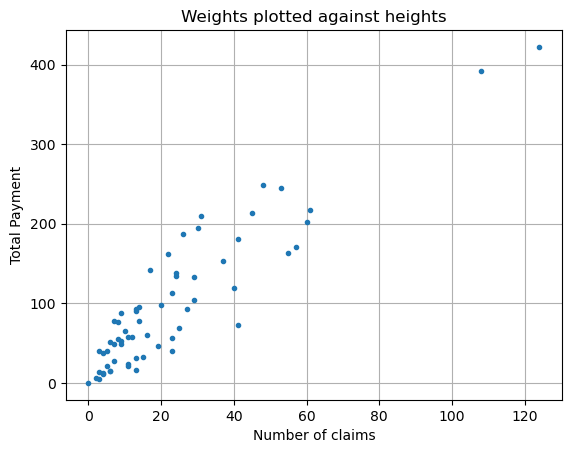

In [3]:
x_values = df['X'].values
y_values = df['Y'].values
plt.title('Weights plotted against heights')
plt.xlabel('Number of claims')
plt.ylabel('Total Payment')
plt.grid(True)
plt.plot(x_values, y_values, '.')

plt.show()

Question 2

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_values.reshape(-1, 1), y_values)  

LinearRegression()

In [5]:
Reg_Line = model.predict(x_values.reshape(-1, 1))
print(Reg_Line)

[388.68743025  84.8571334   64.37419204 443.30860721 156.54742816
 214.58242868  98.51242764  67.7880156  173.61654596  54.13272136
  37.06360356 183.85801664  57.54654492  98.51242764  43.89125068
  26.82213288 101.9262512   40.47742712  30.23595644  98.51242764
  40.47742712  50.7188978   50.7188978   30.23595644 118.995369
  43.89125068  33.64978     88.27095696  43.89125068  33.64978
  19.99448576 105.34007476  40.47742712  37.06360356  95.09860408
  57.54654492 228.23772292  60.96036848  33.64978     74.61566272
  64.37419204 224.82389936 159.96125172 146.30595748 207.75478156
 159.96125172  57.54654492 112.16772188  47.30507424  30.23595644
  78.02948628  64.37419204  64.37419204  71.20183916  47.30507424
 118.995369   122.40919256 101.9262512   50.7188978  125.82301612
  67.7880156  200.92713444 108.75389832]


<function matplotlib.pyplot.show(close=None, block=None)>

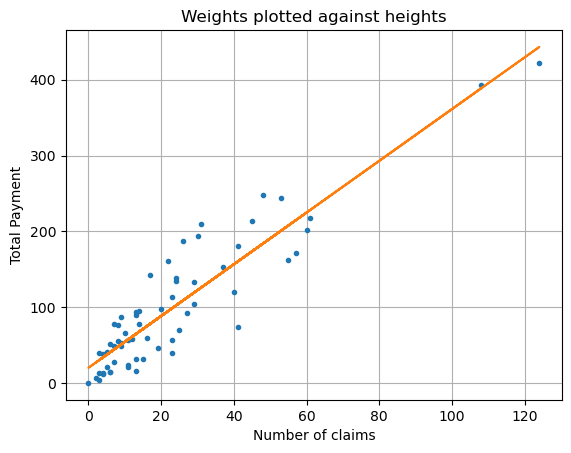

In [6]:
x_values = df['X'].values
y_values = df['Y'].values
plt.title('Weights plotted against heights')
plt.xlabel('Number of claims')
plt.ylabel('Total Payment')
plt.grid(True)
plt.plot(x_values, y_values, '.')
plt.plot(x_values, Reg_Line)

plt.show

Question 3

In [7]:
#Intercept and Slope of regression line

In [8]:
model.intercept_


19.994485759114824

In [9]:
model.coef_

array([3.41382356])

Question 4

In [10]:
#Finding MSE for R Squared value
x_values_reshaped = x_values.reshape(-1, 1)

predicted_y_values = model.predict(x_values_reshaped)
mse = np.mean((y_values - predicted_y_values) ** 2)

print('MSE: %.2f' % mse)


MSE: 1250.74


In [11]:
print('R-squared: %.4f' % model.score(x_values_reshaped, predicted_y_values))

R-squared: 1.0000


In [12]:
#Because the R Squared number can only be between 0 and 1, this outcome means the regression line is a perfect fit for our data.

Question 5

In [13]:
#Predicting the payment of claim of 65

num_claims = np.array([[65]])

In [14]:
total_payment = model.predict(num_claims)

In [15]:
print("Predicted total payment for 65 claims:", total_payment[0])

Predicted total payment for 65 claims: 241.89301716342862


Question 6

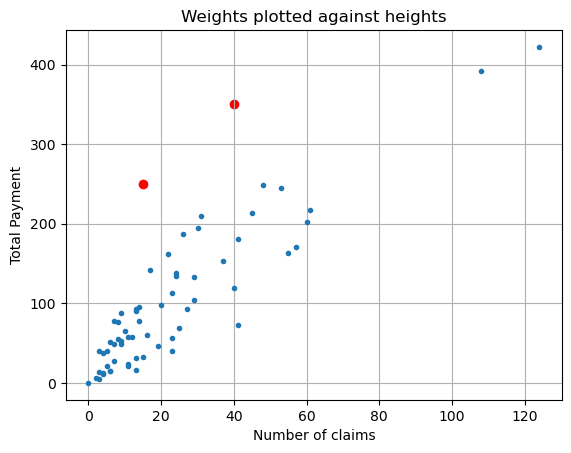

In [30]:
#Old data for X and Y values
x_values = df['X'].values
y_values = df['Y'].values

#New data being added
new_x_values = [15, 40]
new_y_values = [250, 350]

plt.title('Weights plotted against heights')
plt.xlabel('Number of claims')
plt.ylabel('Total Payment')
plt.grid(True)


plt.plot(x_values, y_values, '.')

plt.scatter(new_x_values, new_y_values, color='red')


plt.show()


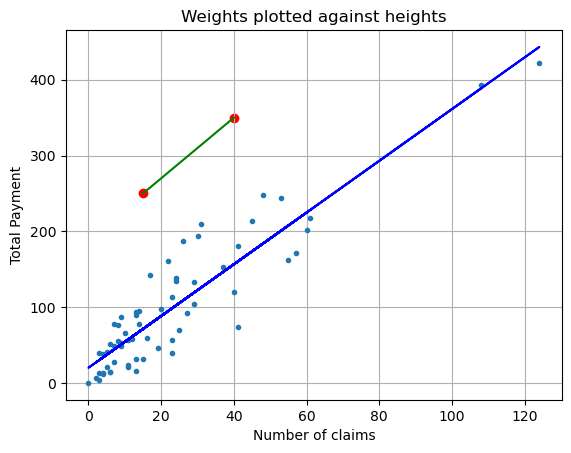

In [39]:
#Old data for X and Y values
x_values = df['X'].values
y_values = df['Y'].values

#New data being added
new_x_values = [15, 40]
new_y_values = [250, 350]

plt.title('Weights plotted against heights')
plt.xlabel('Number of claims')
plt.ylabel('Total Payment')
plt.grid(True)


plt.plot(x_values, y_values, '.')

plt.scatter(new_x_values, new_y_values, color='red')




#Making a regression line for the data that we've already plotted
model_existing = LinearRegression()
model_existing.fit(x_values.reshape(-1, 1), y_values)

#Predicting and plotting values for the existing data
predicted_existing_y = model_existing.predict(x_values.reshape(-1, 1))
plt.plot(x_values, predicted_existing_y, color='blue')


#Repeating the process for the new values
model_new = LinearRegression()
model_new.fit(np.array(new_x_values).reshape(-1, 1), new_y_values)

predicted_new_y = model_new.predict(np.array(new_x_values).reshape(-1, 1))
plt.plot(new_x_values, predicted_new_y, color='green')


plt.show()


In [41]:
#The new regression line is much smaller than the original, as it covers a much smaller set of data

Question 7

To identify outliers in the data, as well as extreme values, we must check for points that do not follow the
general trend of the rest of the data. There is an outlier around [41, 80] or so, based on how far it is from the rest of the plot. For extreme points, the new x and y data we created definetly applies to this, as well as the far top right of the graph, the two points around [130,390], and [140, 420]. These extreme points effect the regression line heavily by bringing it up to the very top of the graph. the outliers merely center the line in the middle of everything.

Quesion 8

In [54]:
df = pd.read_csv('fish.csv')

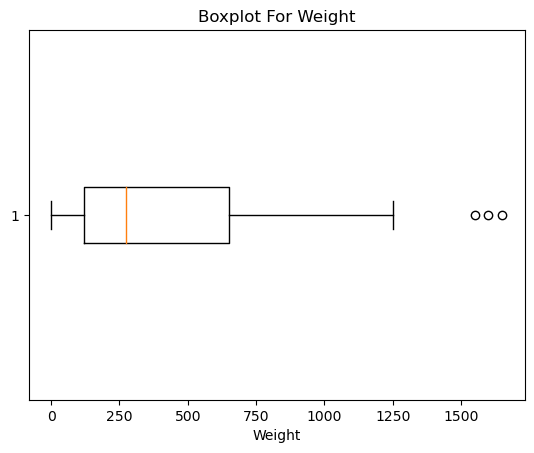

In [55]:
plt.boxplot(df['Weight'], vert=False)
plt.title('Boxplot For Weight')
plt.xlabel('Weight')
plt.show()

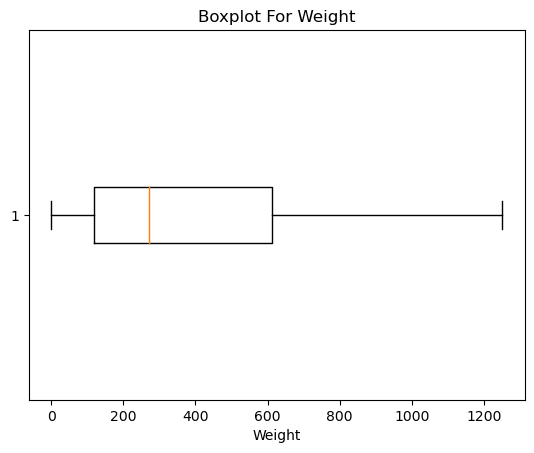

In [66]:
#Now we need to remove the outliers. We'll start by getting the data for each point on the boxplot
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1

#Now we define the lower and upper bounds so we can detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter the data so that it deletes the outliers but keeps the majority of the data
filtered_df = df[(df['Weight'] >= lower_bound) & (df['Weight'] <= upper_bound)]


plt.boxplot(filtered_df['Weight'], vert=False)
plt.title('Boxplot For Weight')
plt.xlabel('Weight')
plt.show()


Question 9

In [69]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80% train, 20% test)
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)


print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)


Training set shape: (127, 6)
Testing set shape: (32, 6)


Quesion 10

In [72]:
#We must make a liner regression model for this data. Y will be our weight column, so X needs to be everything but the weight column.
x_train = train_df.drop(columns=['Weight']) 
y_train = train_df['Weight']  

In [76]:
model = LinearRegression()
model.fit(x_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -515.3056513384323
Coefficients: [ 43.5352649    7.82179624 -25.25670105  23.2289123   27.06649294]


In [80]:
from sklearn.metrics import r2_score

#Split the test data into two just like how we did the train data
x_test = test_df.drop(columns=['Weight'])  
y_test = test_df['Weight']  

y_pred = model.predict(x_test)

#Calculate r squared
r_squared = r2_score(y_test, y_pred)
print(r_squared)


0.8821430593048695


Question 11

In [91]:
#To utalize a correlation matrix, can use the .corr method
correlation_matrix = df.corr()

#Now we try to find which variables have the strongest correlation to 'Weight'
weight_correlation = correlation_matrix['Weight'].sort_values(ascending=False)


print("Two variables with the strongest correlation to 'Weight':")
print(weight_correlation[1:3]) 

Two variables with the strongest correlation to 'Weight':
Length3    0.923044
Length2    0.918618
Name: Weight, dtype: float64


Question 12

In [100]:
#Now we are to make a new liner regression model, start by taking the two variables with the strongest correlation
x_train = df[['Length3', 'Length2']]
y_train = df['Weight']

In [101]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [111]:
#Now let's find the r-squared value, and print out the coefficients and intercept.
y_pred = model.predict(x_train)

r_squared = r2_score(y_train, y_pred)

print(r_squared)

0.8520974779906415


In [112]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [25.80772393  2.89075232]
Intercept: -489.71533427212637


The formula for this model would be something like this

y = c + a x1 + bx 2

Where -

y is our weight prediction 

c is the linear regression line

a is length3

x1 is the value of length3

b is length2

and x2 is the value of length2



THIS IS AN INDIVIDUAL ASSIGNMENT. YOU MAY NOT DISCUSS THIS ASSIGNMENT WITH ANYONE WITHIN OR OUTSIDE THE CLASS (except the instructor) DO not discuss your approaches or your code with colleagues. There are many ways to implement this assignment, and it is extremely easy to spot code that has been inspired by someone else’s code and to identify unauthorized collaborations.If you choose to utilize something you find online, cite that resource, but DO NOT share that resource with anyone else.By submitting this assignment, you certify that no unauthorized assistance has been received or given in the completion of this work. 

Kade Levy